In [39]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
from pylab import rcParams
import urllib
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pickle
import seaborn as sns

In [46]:
df=pd.read_csv('amiya1-modified.csv')
x_prime=df.iloc[:,0:4]
y=df.iloc[:,4]
x_prime.head()

,views,likes,dislikes,comment_total
0,4394029,320053,5931,46245
1,7860119,185853,26679,0
2,5845909,576597,39774,170708
3,2642103,24975,4542,12829
4,1168130,96666,568,6666


In [29]:
x=preprocessing.scale(x_prime)
pd.DataFrame(x).head()

,0,1,2,3
0,1.608771,3.125860,0.383655,2.056704
1,3.222740,1.656768,2.301675,-0.227634
2,2.284833,5.934256,3.512223,8.204734
3,0.792995,-0.104369,0.255251,0.406073
4,0.106646,0.680435,-0.112120,0.101643


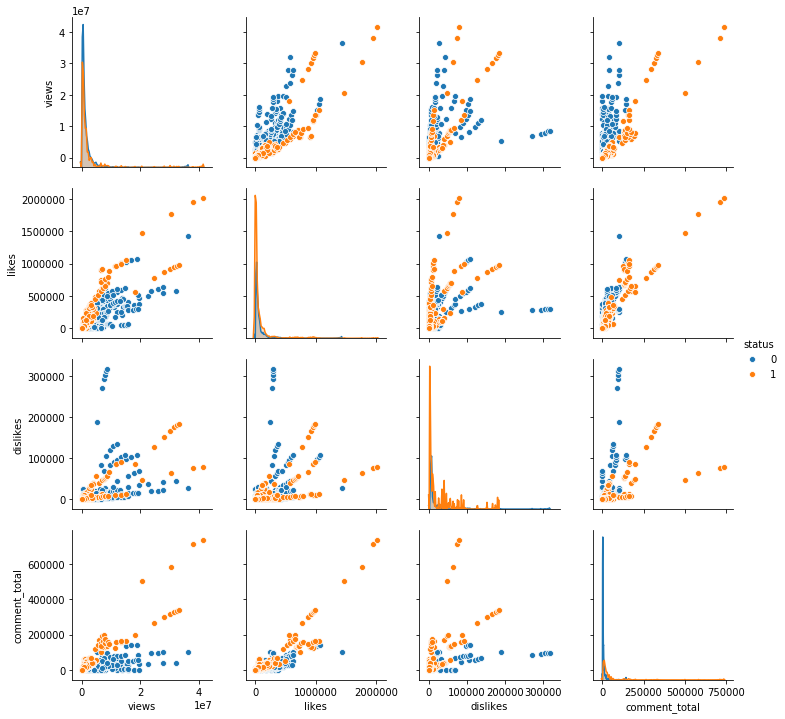

In [51]:
sns.pairplot(df,hue='status',vars=['views','likes','dislikes','comment_total'])

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33, random_state=42)

In [31]:
clf=KNeighborsClassifier()
clf.fit(x_train,y_train)
print(clf)

KNeighborsClassifier()


In [32]:
y_pred=clf.predict(x_test)

In [34]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2365
           1       0.93      0.80      0.86       275

    accuracy                           0.97      2640
   macro avg       0.95      0.89      0.92      2640
weighted avg       0.97      0.97      0.97      2640



In [38]:
filename = 'finalized_model.sav'
pickle.dump(clf, open(filename, 'wb'))